In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

stock_data= pd.read_csv('Minor Project Data set (Stock Price Prediction).csv')
stock_data


In [17]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [13]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [18]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [20]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])
print(stock_data.info())
print(stock_data.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB
None
               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.840554  0.841665  0.840878  0.841384   0.841384   
Open       0.840554  1.000000  0.998605  0.998508  0.996812   0.996812   
High       0.841665  0.998605  1.000000  0.998203  0.998551   0.998551   
Low        0.840878  0.998508  0.998203  1.000000  0.998544   0.998544   
Close      0.841384  0.996

In [21]:
stock_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


In [22]:
stock_prediction['Close'].rolling(window=20).mean()


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1004    487.853500
1005    480.841501
1006    472.758000
1007    464.661999
1008    457.506001
Name: Close, Length: 1009, dtype: float64

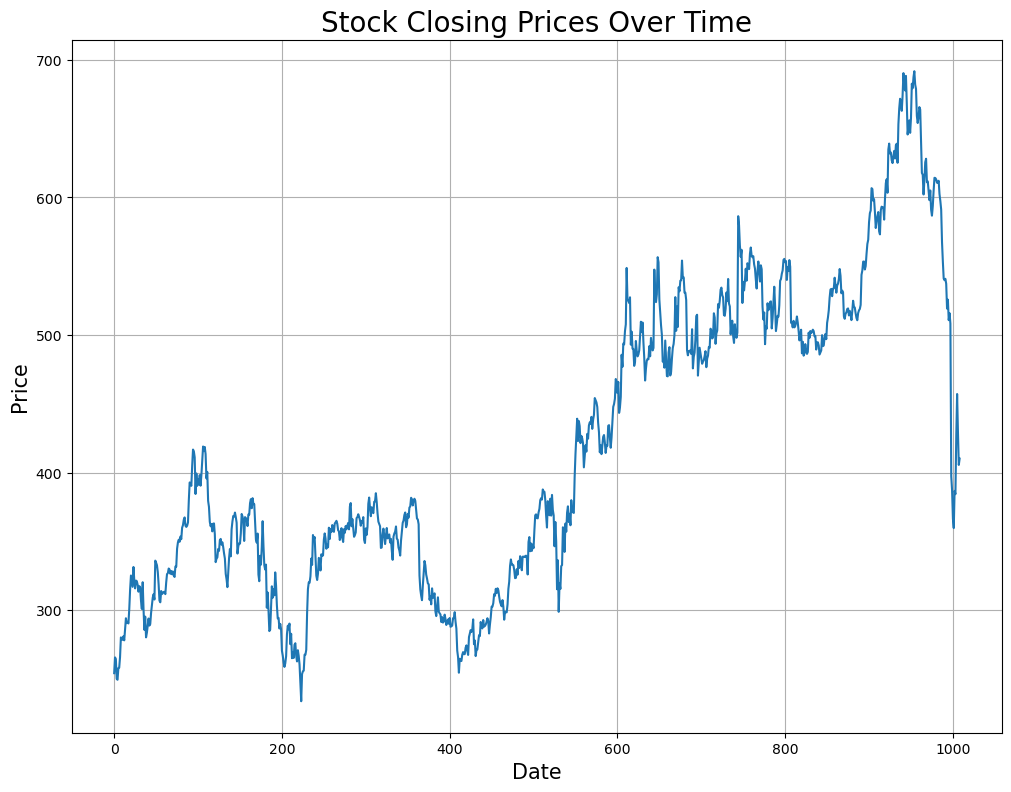

In [34]:
plt.figure(figsize=(12, 9))
stock_data['Close'].plot()  
plt.title('Stock Closing Prices Over Time',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid()
plt.show()


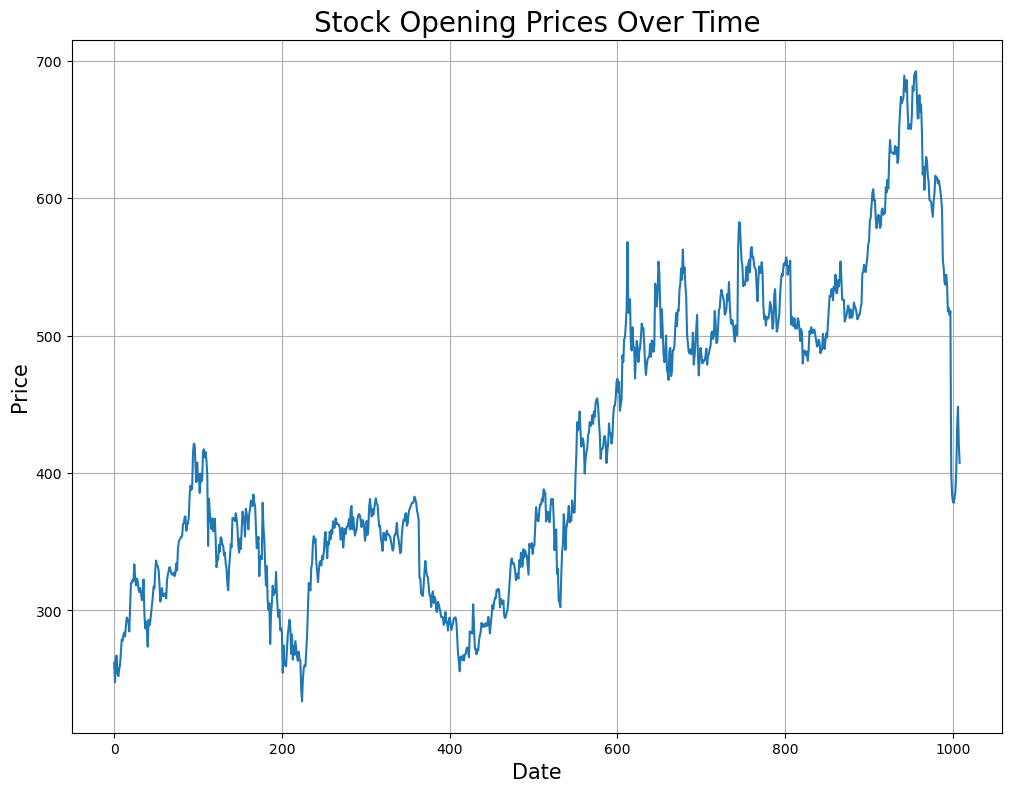

In [33]:
plt.figure(figsize=(12, 9))  # Set the figure size
stock_data['Open'].plot()  # Plotting the closing prices
plt.title('Stock Opening Prices Over Time',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid()
plt.show()

In [35]:
#now lets compare them using graphs

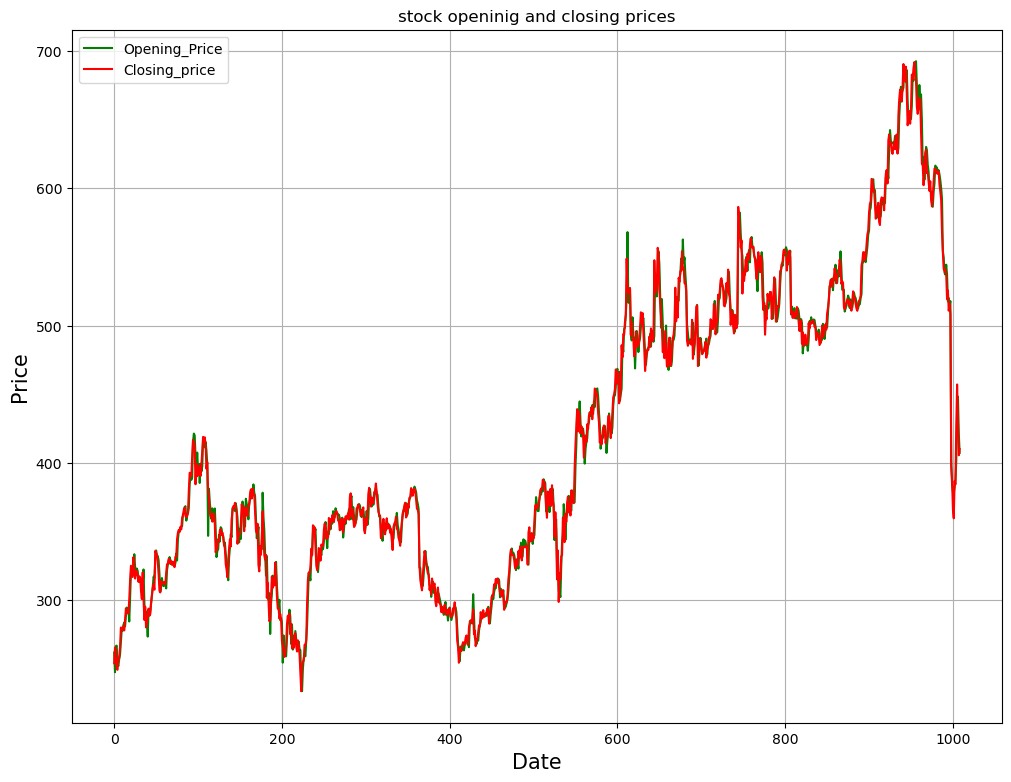

In [37]:
plt.figure(figsize=(12,9))
plt.plot(stock_data['Open'],label='Opening_Price',color='green')
plt.plot(stock_data['Close'],label="Closing_price",color='red')
plt.title("stock openinig and closing prices")
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.legend()
plt.grid()
plt.show()

In [38]:
#Now lets see the difference betweeen opeing and closing prices

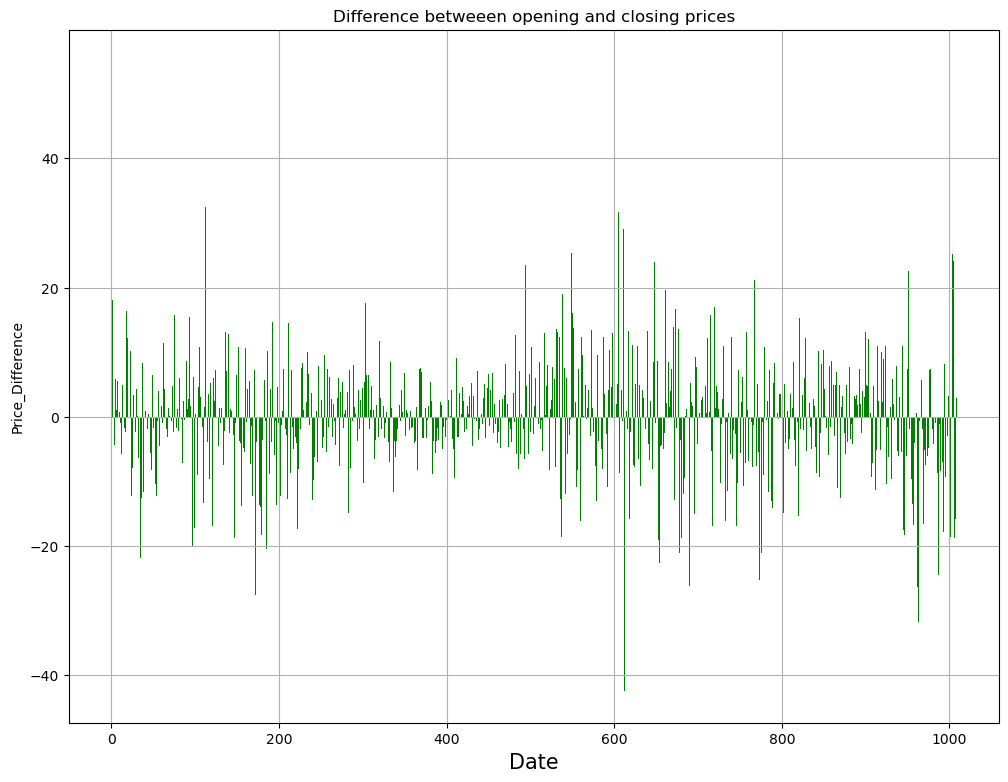

In [39]:
diff=stock_data['Close']-stock_data["Open"]
plt.figure(figsize=(12,9))
plt.bar(stock_data.index,diff,color='green')
plt.title('Difference betweeen opening and closing prices')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price_Difference')
plt.grid()
plt.show()

In [40]:
#from the above graph
#here positive difference(closing price>opening)
#negative difference(closing>opening)

In [49]:
stock_data['Days']=np.arange(1,len(stock_data)+1)
features=stock_data['Days']
target=stock_data['Close']

In [52]:
#splitting the data
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.3,shuffle=False)
model=LinearRegression()
features_train=features_train.values.reshape(-1, 1)
features_test=features_test.values.reshape(-1, 1)

model.fit(features_train,target_train)
prediction=model.predict(features_test)

In [53]:
#evaluating the model
mse=mean_squared_error(target_test,prediction)
print(f"mean squared error is {mse}")

mean squared error is 8359.027595057749


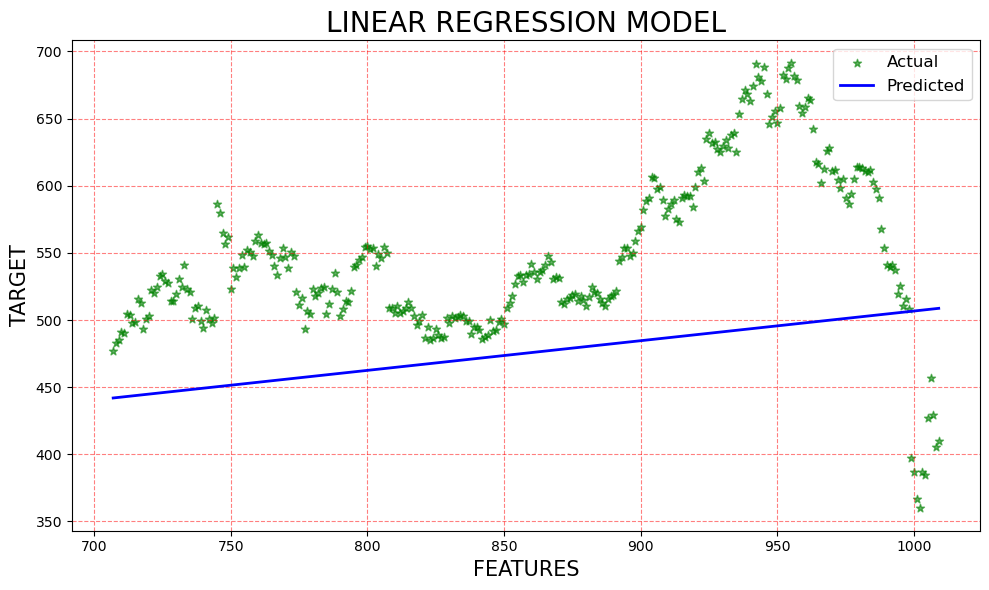

In [64]:
#plotting
plt.figure(figsize=(10,6))
plt.scatter(features_test,target_test,color='green',label='Actual',alpha=0.6,marker='*')
plt.plot(features_test,prediction,color='blue',label='Predicted',linewidth=2)
plt.title('LINEAR REGRESSION MODEL',fontsize=20)
plt.xlabel('FEATURES',fontsize=15)
plt.ylabel('TARGET',fontsize=15)
plt.legend(fontsize=12)
plt.grid(True,linestyle='--',alpha=0.5,color="red")
plt.tight_layout()
plt.show()